In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("Prostate_Cancer.csv")
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [3]:
print(df.shape)
print(df.columns)

(100, 10)
Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')


In [4]:
df=df.drop(['id'],1)

In [5]:
features=['radius','texture','area','smoothness','perimeter','compactness','symmetry','fractal_dimension']
X=df[features]
y=df['diagnosis_result']

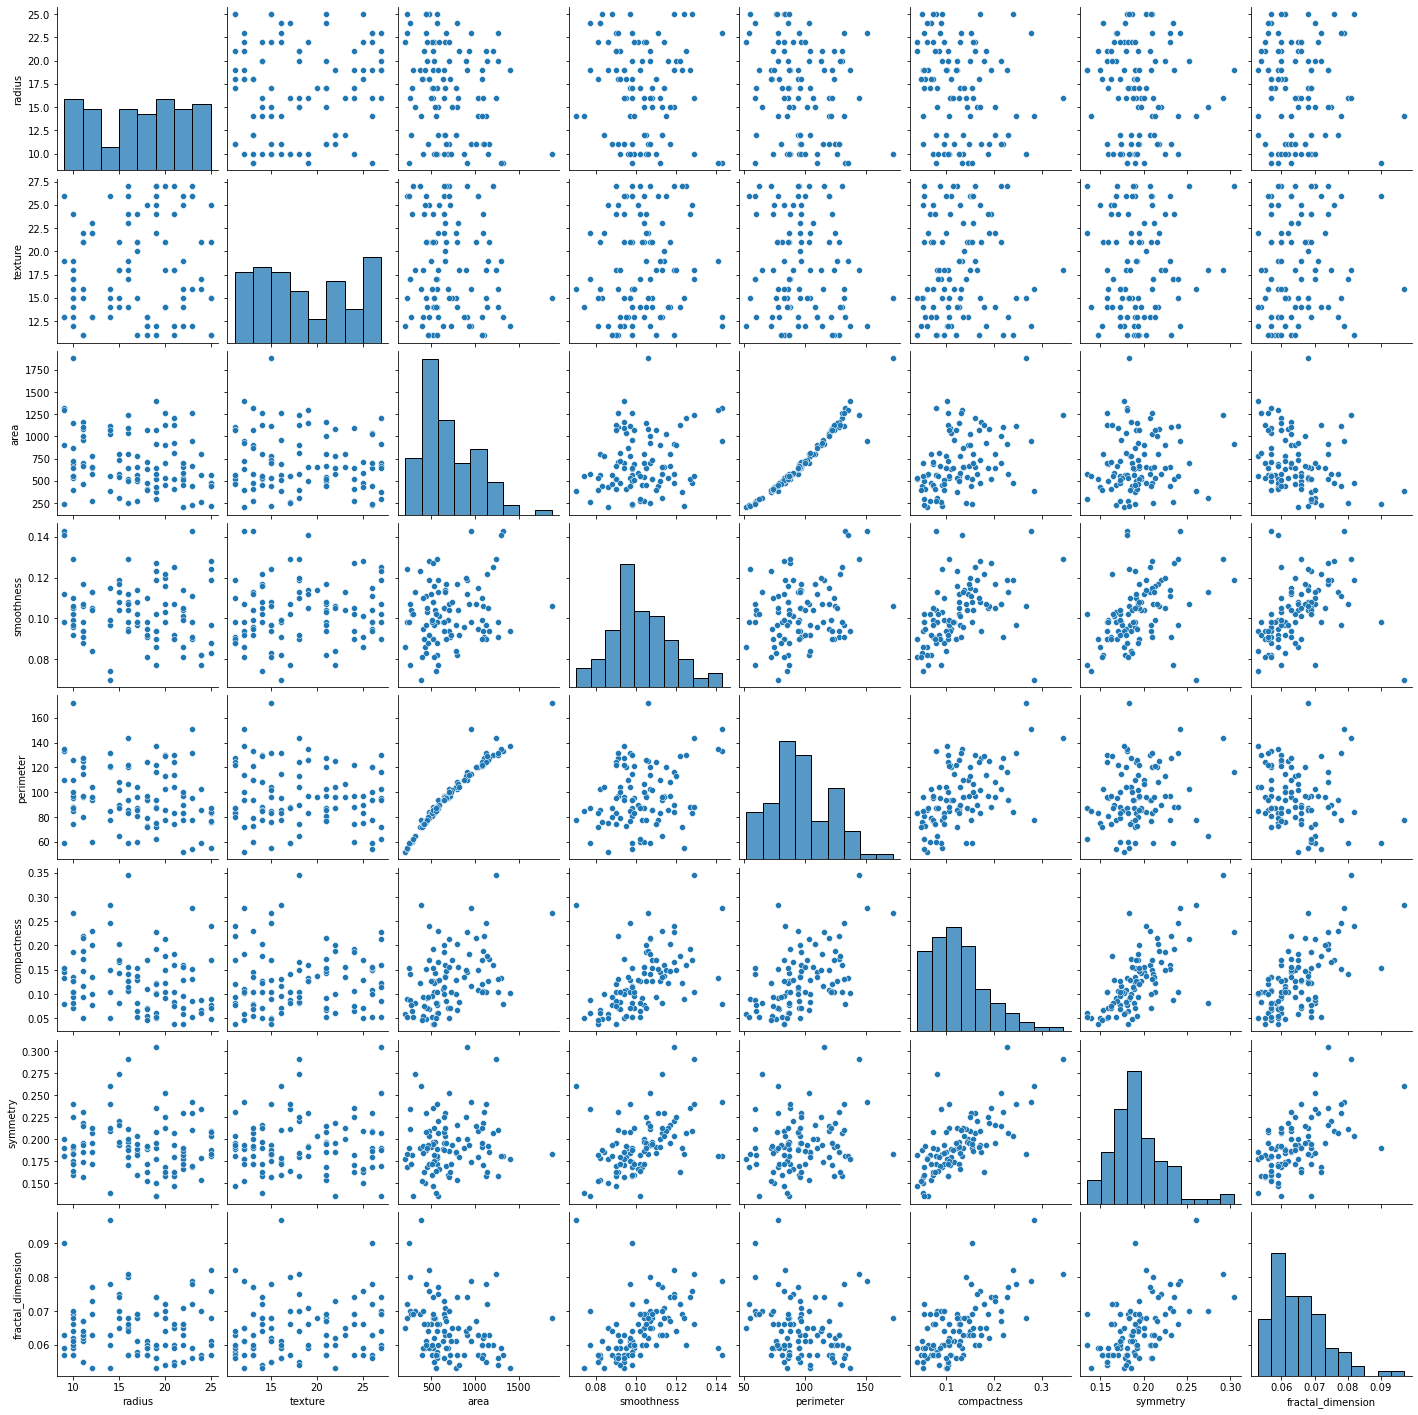

In [6]:
sns.pairplot(X,diag_kind='hist')
plt.show()

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(70, 8)
(30, 8)
(70,)
(30,)


In [8]:
def knn_m(neighbor,metric):
    knn=KNeighborsClassifier(n_neighbors=neighbor, metric=metric)
    knn_model=knn.fit(X_train,y_train)
    knn_prediction=knn_model.predict(X_test)
    
    ac=accuracy_score(y_test,knn_prediction)
    cm=confusion_matrix(y_test,knn_prediction)
    cr=classification_report(y_test,knn_prediction)
    
    return knn_model,ac,cm,cr

In [9]:
knn_model,ac,cm,cr=knn_m(8,'manhattan')

In [10]:
print(knn_model)    

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')


In [11]:
print(ac)
print(cm)
print(cr)

0.8666666666666667
[[ 8  0]
 [ 4 18]]
              precision    recall  f1-score   support

           B       0.67      1.00      0.80         8
           M       1.00      0.82      0.90        22

    accuracy                           0.87        30
   macro avg       0.83      0.91      0.85        30
weighted avg       0.91      0.87      0.87        30



#### Euclidean model
Changing neighbors

In [12]:
knn_model,ac,cm,cr=knn_m(5,'euclidean')

In [13]:
print(knn_model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [14]:
print(ac)
print(cm)
print(cr)

0.8333333333333334
[[ 7  1]
 [ 4 18]]
              precision    recall  f1-score   support

           B       0.64      0.88      0.74         8
           M       0.95      0.82      0.88        22

    accuracy                           0.83        30
   macro avg       0.79      0.85      0.81        30
weighted avg       0.86      0.83      0.84        30

